In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from math import pow
import numpy as np

In [2]:
def LFM(R,P,Q,K,steps=5000,learning_rate=0.0002,beta=0.02):
    # 转置
    Q=Q.T
    result=[]
    for step in range(steps):
        # i 代表某一行
        for i in range(len(R)):
            # j 代表某一列
            for j in range(len(R[i])):
                # 只算已经评过分的损失值
                if R[i][j]>0:
                    # 对应P的某一行，与Q的某一列，进行点积计算，结果是一个数字
                    # 这里和PPT写的相反了，所以下面对K的循环里面，本来应该减去偏导的，变成加上偏导了
                    loss_i_j = R[i][j] - np.dot(P[i,:],Q[:,j])
                    # 一个用户对一个商品的评分=1*K和K*1向量的点积。所以，原始矩阵R某行某列的一个损失公式，就会有2K个参数需要更新，需要求偏导！
                    for k in range(K):
                        P[i][k] = P[i][k] + learning_rate * (2*loss_i_j*Q[k][j]-beta*P[i][k])
                        Q[k][j] = Q[k][j] + learning_rate * (2*loss_i_j*P[i][k]-beta*Q[k][j])
        
        # P和Q更新完，点积后的矩阵
        error_R = np.dot(P,Q)
        loss = 0
        # 这里是把每行每列的损失，全部加起来
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j]>0:
                    # 原始矩阵R某行某列的一个损失公式，损失的值就有一个，但正则化同样，需要加2K个！
                    loss = loss + pow(R[i][j]-np.dot(P[i,:],Q[:,j]),2)
                    for k in range(K):
                        loss = loss + (beta/2)*(pow(P[i][k],2)+pow(Q[k][j],2))
        result.append(loss)
        if loss<0.001:
            break
    return P,Q.T,result

In [3]:
R=[
    [5,0,3,0],
    [0,4,4,0],
    [3,5,3,0],
    [0,4,0,3]
]

In [4]:
R = np.array(R)

# 提取维度
N = len(R)
M = len(R[0])
K = 3

# 随机生成一个 N行 K列的矩阵
P = np.random.rand(N,K)
# 随机生成一个 M行 K列的矩阵
Q = np.random.rand(M,K)

P,Q.T

(array([[0.95951833, 0.85429547, 0.31803729],
        [0.83578534, 0.13134344, 0.68463061],
        [0.38793162, 0.39781774, 0.88976768],
        [0.24164347, 0.87570318, 0.70382288]]),
 array([[0.5447604 , 0.83502896, 0.56810144, 0.68477626],
        [0.52497578, 0.16600744, 0.57333349, 0.4396935 ],
        [0.05545639, 0.35211464, 0.76528955, 0.83033993]]))

原始的评分矩阵R为：
 [[5 0 3 0]
 [0 4 4 0]
 [3 5 3 0]
 [0 4 0 3]]
经过MF算法填充0处评分值后的评分矩阵R_MF为：
 [[4.97717349 3.83320776 3.00618717 2.54668447]
 [2.95476046 4.415676   3.44168864 2.71409993]
 [3.00137719 4.5786436  3.50982895 2.58240072]
 [3.17960253 3.98020102 3.23657288 2.99371878]]


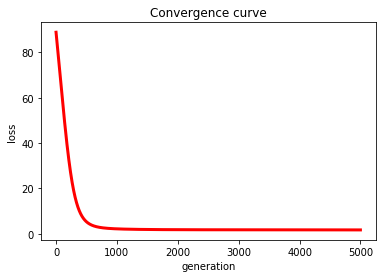

In [12]:
nP,nQ,result=LFM(R,P,Q,K)
print("原始的评分矩阵R为：\n",R)
R_MF=np.dot(nP,nQ.T)
print("经过MF算法填充0处评分值后的评分矩阵R_MF为：\n",R_MF)

#-------------损失函数的收敛曲线图---------------

n=len(result)
x=range(n)
plt.plot(x,result,color='r',linewidth=3)
plt.title("Convergence curve")
plt.xlabel("generation")
plt.ylabel("loss")
plt.show()